# US Tax Data Analysis and Clustering

---


<img src="https://www.unitedstateszipcodes.org/images/zip-codes/zip-codes.png" alt="Zip Codes" width="600" height="300" style="float: right; margin-right: 80px;">

## Problem Definition

**How company can optimize their ad spends based on the income data.**

Method: Categorize the zip codes based on their incomes.

Limitation: _There should be no more than 10 clusters._



## Data

Individual Income Tax Statistics - 2019 ZIP Code Data (Statistics Of Income)

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 800)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Here how our data looks like.

In [2]:

df = pd.read_csv("./data/19zpallnoagi.csv")
df.head()

,STATEFIPS,STATE,ZIPCODE,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01400,A01400,N01700,A01700,SCHF,N02300,A02300,N02500,A02500,N26270,A26270,N02900,A02900,N03220,A03220,N03300,A03300,N03270,A03270,N03150,A03150,N03210,A03210,N04450,A04450,N04100,A04100,N04200,A04200,N04470,A04470,A00101,N17000,A17000,N18425,A18425,N18450,A18450,N18500,A18500,N18800,A18800,N18460,A18460,N18300,A18300,N19300,A19300,N19500,A19500,N19530,A19530,N19570,A19570,N19700,A19700,N20950,A20950,N04475,A04475,N04800,A04800,N05800,A05800,N09600,A09600,N05780,A05780,N07100,A07100,N07300,A07300,N07180,A07180,N07230,A07230,N07240,A07240,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,0,2100740.00,914850.00,743250.00,395440.00,1925700.00,75480.00,1116020.00,1434160.00,4085710.00,31000.00,22690.00,8310.00,4490.00,414360.00,511240.00,130815070.00,2100670.00,132129733.00,1760950.00,91213539.00,552680.00,1100308.00,268270.00,2122402.00,245060.00,1609924.00,76450.00,90443.00,359160.00,3374570.00,231930.00,4881146.00,186930.00,3420409.00,424560.00,11155464.00,38620.00,34990.00,107337.00,327590.00,4991389.00,86660.00,7018482.00,463380.00,1314663.00,43800.00,11260.00,4400.00,116134.00,34650.00,275100.00,19590.00,93986.00,139600.00,155085.00,1931320.00,33805170.00,1931270.00,33154524.00,327750.00,647390.00,166360.00,5909478.00,34290184.00,45810.00,654479.00,133920.00,1214226.00,23680.00,42843.00,136710.00,335791.00,110740.00,46929.00,159670.00,1006379.00,164780.00,1045271.00,122240.00,1294464.00,720.00,5859.00,5110.00,2848.00,5900.00,64815.00,147810.00,2343223.00,7070.00,127247.00,229930.00,1509419.00,1617000.00,91874439.00,1615690.00,15030269.00,380.00,4636.00,34500.00,37929.00,797610.00,1482959.00,69820.00,65687.00,95670.00,55005.00,119770.00,128328.00,154010.00,29858.00,576980.00,1089134.00,23690.00,26485.00,253170.00,695726.00,78910.00,672888.00,85930.00,731410.00,2007350.00,17896016.00,486090.00,1348466.00,443720.00,1209646.00,356250.00,621805.00,116190.00,105274.00,23950.00,17716.00,1329580.00,13520654.00,1469630.00,14554116.00,30540.00,50703.00,39520.00,141384.00,418210.00,1875183.00,1633620.00,5232476.00,1603620.00,4711318.00,32340.00,463956.00
1,1,AL,35004,0,5330.00,2310.00,2060.00,840.00,4910.00,200.00,2440.00,3740.00,10360.00,30.00,30.00,0.00,0.00,990.00,1230.00,315055.00,5330.00,317526.00,4620.00,259009.00,1360.00,1408.00,580.00,1410.00,510.00,986.00,250.00,263.00,750.00,5915.00,460.00,3056.00,490.00,7078.00,960.00,21538.00,0.00,70.00,267.00,800.00,11021.00,140.00,4915.00,1270.00,2471.00,130.00,32.00,0.00,0.00,50.00,367.00,60.00,207.00,590.00,695.00,4950.00,88349.00,4950.00,86718.00,840.00,1632.00,400.00,10517.00,44806.00,120.00,1606.00,340.00,1783.00,40.00,68.00,330.00,378.00,280.00,90.00,380.00,2038.00,390.00,2067.00,320.00,2382.00,0.00,0.00,0.00,0.00,0.00,0.00,350.00,3875.00,0.00,0.00,510.00,1961.00,4380.00,219380.00,4390.00,30230.00,0.00,0.00,120.00,148.00,2030.00,4335.00,90.00,5.00,410.00,244.00,300.00,334.00,370.00,67.00,1590.00,3533.00,60.00,69.00,520.00,1177.00,190.00,1870.00,220.00,2051.00,5130.00,35790.00,820.00,1925.00,710.00,1691.00,650.00,1112.00,240.00,197.00,50.00,40.00,3850.00,25896.00,4090.00,27425.00,30.00,18.00,20.00,30.00,1120.00,2718.00,4120.00,11050.00,4060.00,10414.00,70.00,320.00
2,1,AL,35005,0,3280.00,1520.00,800.00,900.00,2980.00,120.00,1670.00,2470.00,6060.00,40.00,40.00,0.00,0.00,920.00,750.00,133950.00,3280.00,134803.00,2800.00,109801.00,460.00,417.00,150.00,217.00,130.00,149.00,140.00,117.00,520.00,81.00,100.00,173.00,230.00,3112.00,610.00,13464.00,0.00,50.00,148.00,470.00,5354.00,30.00,279.00,540.00,853.00,50.00,13.00,0.00,0.00,0.00,0

In [3]:


print(f"Tax data has {df.shape[0]} rows and {df.shape[1]} columns.")

Tax data has 27695 rows and 152 columns.


In [4]:

df_income = df[(df["ZIPCODE"]!=0) & (df["ZIPCODE"]!=99999)].iloc[:,list(range(1, 3)) + list(range(20, 22))]
df_income.rename(columns={"N02650": "TOTAL_ANNUAL_INCOME_RETURN", "A02650": "TOTAL_ANNUAL_INCOME_AMOUNT"}, inplace=True)
df_income["MEAN_ANNUAL_INCOME"] = df_income["TOTAL_ANNUAL_INCOME_AMOUNT"] / df_income["TOTAL_ANNUAL_INCOME_RETURN"]
df_income["MEAN_ANNUAL_INCOME"] = round((df_income["MEAN_ANNUAL_INCOME"]*1000).astype(np.int64))
df_income["TOTAL_ANNUAL_INCOME_RETURN"] = round(df_income["TOTAL_ANNUAL_INCOME_RETURN"].astype(np.int64))
df_income["TOTAL_ANNUAL_INCOME_AMOUNT"] = round((df_income["TOTAL_ANNUAL_INCOME_AMOUNT"]*1000).astype(np.int64))
df_income[["TOTAL_ANNUAL_INCOME_RETURN", "TOTAL_ANNUAL_INCOME_AMOUNT", "MEAN_ANNUAL_INCOME"]].describe().T

,count,mean,std,min,25%,50%,75%,max
TOTAL_ANNUAL_INCOME_RETURN,27593.00,5510.11,7310.86,90.00,600.00,1990.00,8020.00,59000.00
TOTAL_ANNUAL_INCOME_AMOUNT,27593.00,433438166.31,731859725.09,1306000.00,33118000.00,119539000.00,539463000.00,12331790000.00
MEAN_ANNUAL_INCOME,27593.00,69830.22,55670.18,12700.00,48234.00,57569.00,72875.00,3296829.00


Our filtered data for analysing and clustering.

In [5]:

df_income.head()

,STATE,ZIPCODE,TOTAL_ANNUAL_INCOME_RETURN,TOTAL_ANNUAL_INCOME_AMOUNT,MEAN_ANNUAL_INCOME
1,AL,35004,5330,317526000,59573
2,AL,35005,3280,134803000,41098
3,AL,35006,1230,67693000,55034
4,AL,35007,12380,763960000,61709
5,AL,35010,8090,463806000,57330


## Some Analysis of Data

In [6]:

import plotly.subplots as sp

column_name = 'MEAN_ANNUAL_INCOME'

df_income_all = df_income[df_income[column_name].notna()]
df_income_filtered = df_income[(df_income[column_name] >= 0) & (df_income[column_name] < 110000)]

fig_all = px.box(df_income_all, y=column_name, title='Mean Annual Income Distribution - All Data')

fig_filtered = px.box(df_income_filtered, y=column_name, title='Mean Annual Income Distribution - High Data Concentration')

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Mean Annual Income Distribution - All Data', 'Mean Annual Income Distribution - High Data Concentration Area'))

fig.add_trace(go.Box(fig_all['data'][0]), row=1, col=1)
fig.add_trace(go.Box(fig_filtered['data'][0]), row=1, col=2)

fig.update_layout(
    height=800
)

fig.show()

In [7]:

df_state_agg = df_income.groupby("STATE").agg({
    'TOTAL_ANNUAL_INCOME_RETURN': 'sum',
    'TOTAL_ANNUAL_INCOME_AMOUNT': 'sum',
    'MEAN_ANNUAL_INCOME': 'mean'
}).reset_index()
df_state_agg.head()

,STATE,TOTAL_ANNUAL_INCOME_RETURN,TOTAL_ANNUAL_INCOME_AMOUNT,MEAN_ANNUAL_INCOME
0,AK,281360,22025125000,71655.09
1,AL,2074930,129486928000,54140.74
2,AR,1221280,74252167000,49771.69
3,AZ,3078780,223588828000,69082.80
4,CA,17973450,1665418504000,96983.19


In [8]:

fig = px.scatter(df_state_agg, x="STATE", y="TOTAL_ANNUAL_INCOME_RETURN", size="TOTAL_ANNUAL_INCOME_RETURN", hover_name="STATE", text="STATE", color="TOTAL_ANNUAL_INCOME_RETURN",
                 color_continuous_scale='Plasma',
                 title="Tax Returns by State",
                 labels={"TOTAL_ANNUAL_INCOME_RETURN": "Return Count",})

fig.update_traces(textposition='top center')

fig.update_layout(
    height=500
)

fig.show()

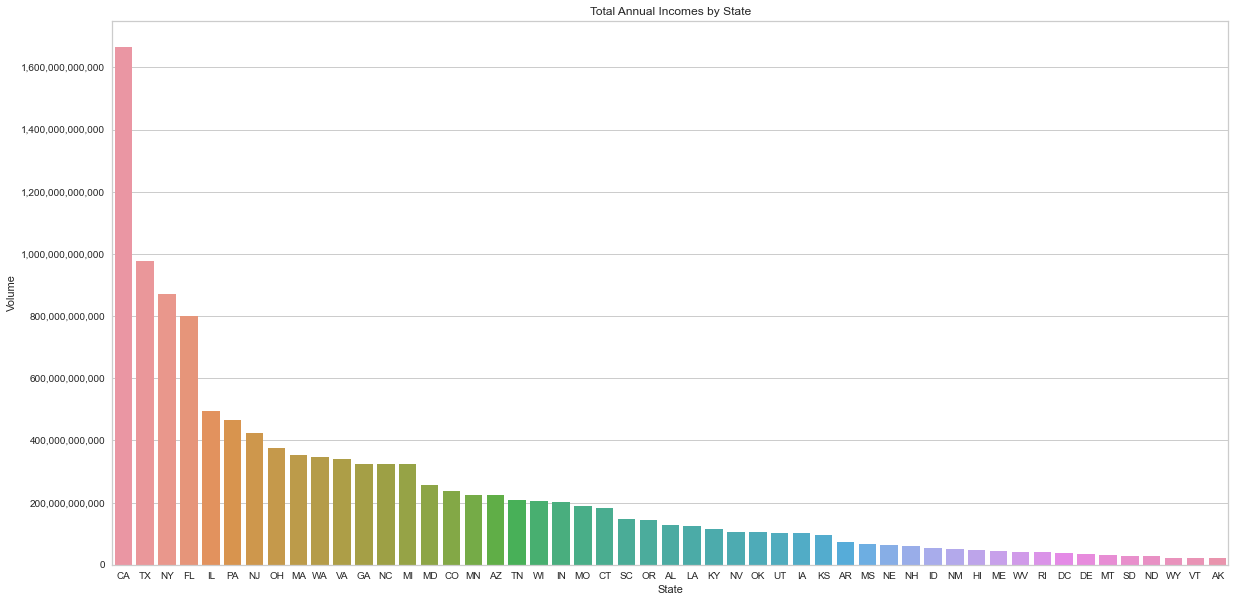

In [9]:

def format_ticks(value, pos):
    return '{:,.0f}'.format(value) 

plt.figure(figsize=(20,10))
ax = sns.barplot(x="STATE", y="TOTAL_ANNUAL_INCOME_AMOUNT", data=df_state_agg.sort_values(by="TOTAL_ANNUAL_INCOME_AMOUNT",ascending=False))
ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
ax.set(xlabel='State', ylabel='Volume', title='Total Annual Incomes by State')
plt.show()

In [10]:

fig = px.scatter(df_state_agg, x="STATE", y="MEAN_ANNUAL_INCOME", size="MEAN_ANNUAL_INCOME", hover_name="STATE", text="STATE", color="TOTAL_ANNUAL_INCOME_RETURN",
                 color_continuous_scale='Plasma',
                 title="Mean Annual Income by State",
                 labels={"MEAN_ANNUAL_INCOME": "Mean Annual Income",
                         "TOTAL_ANNUAL_INCOME_RETURN": "Tax Return"})

fig.update_traces(textposition='top center')

fig.update_layout(
    height=500,
    width=1500
)

fig.show()

In [11]:
df_model_one_column = df_income.loc[:, ['MEAN_ANNUAL_INCOME']]


In [12]:
df_model_one_column.isna().sum()

MEAN_ANNUAL_INCOME    0
dtype: int64

In [13]:
df_model_one_column.duplicated().sum()

5114

In [14]:
scaler = MinMaxScaler()
df_scaled_one_column = scaler.fit_transform(df_model_one_column)

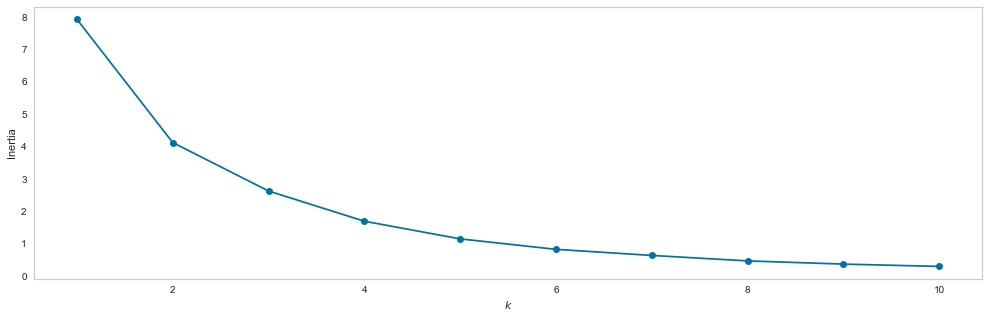

In [15]:

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(df_scaled_one_column)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]


plt.figure(figsize=(17, 5))
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.grid()


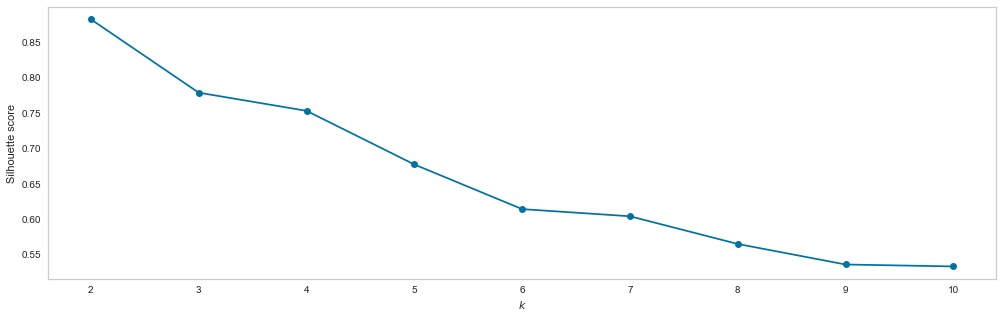

In [16]:

from sklearn.metrics import silhouette_score


silhouette_scores = [silhouette_score(df_scaled_one_column, model.labels_)
                     for model in kmeans_per_k[1:]]


plt.figure(figsize=(17, 5))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

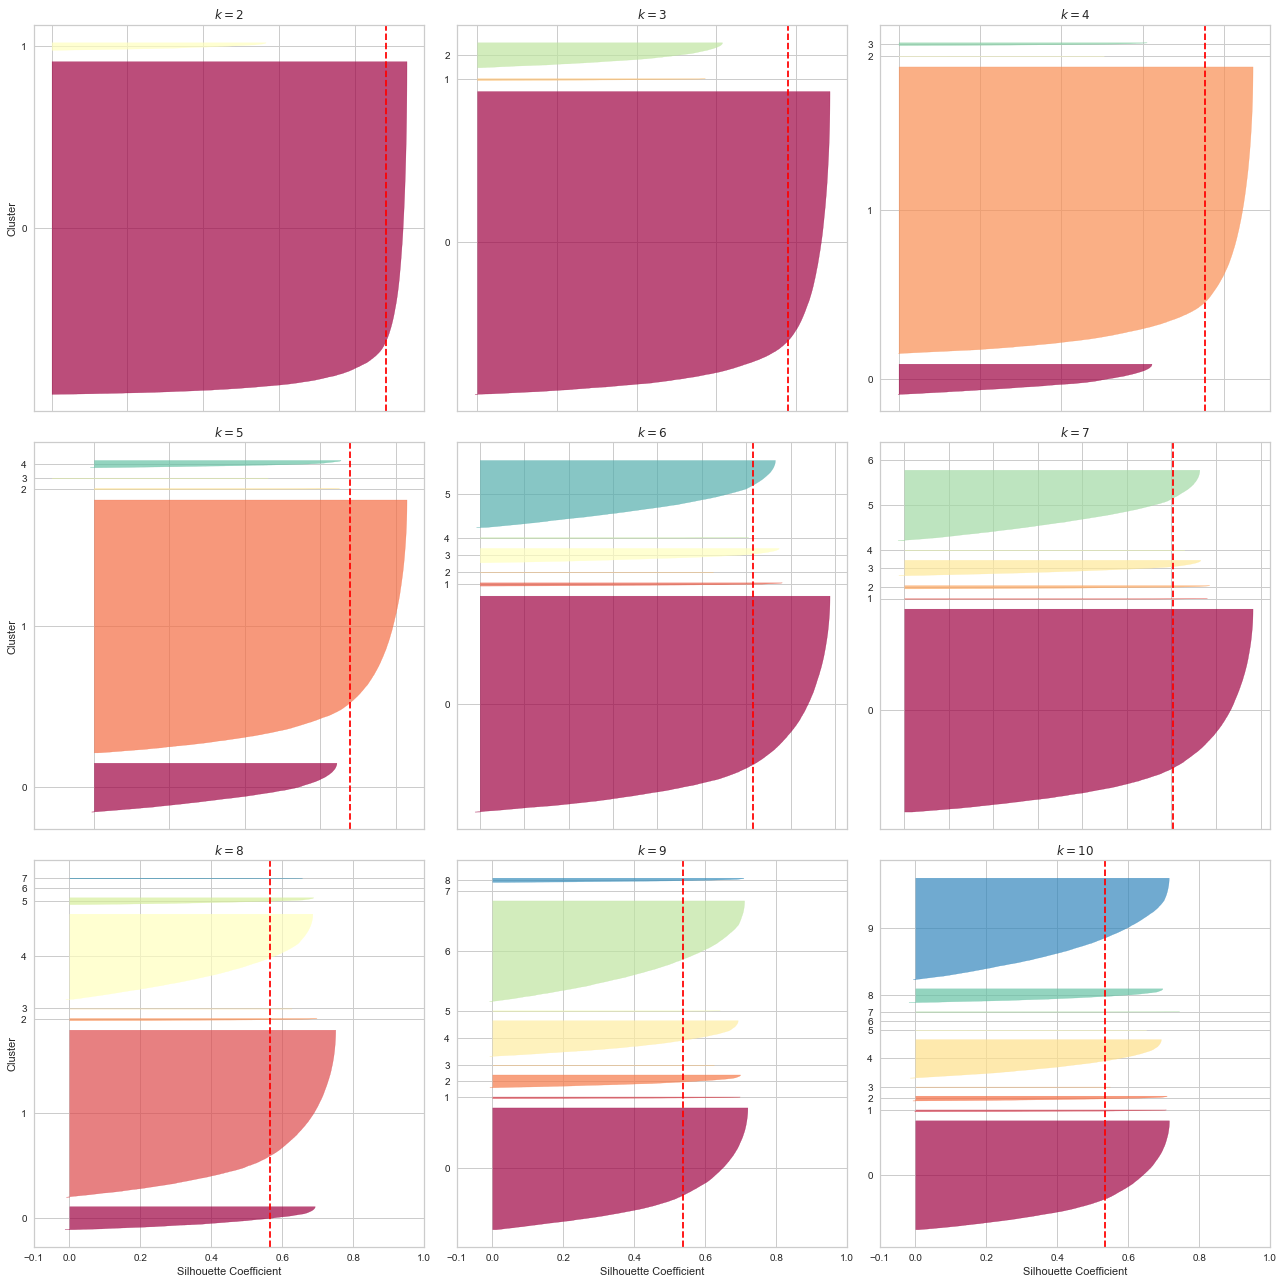

In [17]:

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.cluster import KMeans

k_values = range(2, 11)

fig, axs = plt.subplots(3, 3, figsize=(18, 18))
axs = axs.flatten()

for idx, k in enumerate(k_values):
    ax = axs[idx]
    
    y_pred = kmeans_per_k[k - 1].labels_
    
    silhouette_coefficients = silhouette_samples(df_scaled_one_column, y_pred)

    padding = len(df_scaled_one_column) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        ax.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    ax.yaxis.set_major_locator(FixedLocator(ticks))
    ax.yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (2, 5, 8):
        ax.set_ylabel("Cluster")
    
    if k in (8, 9, 10):
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax.set_xlabel("Silhouette Coefficient")
    else:
        ax.tick_params(labelbottom=False)

    ax.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    ax.set_title(f"$k={k}$")

plt.tight_layout()
plt.show()


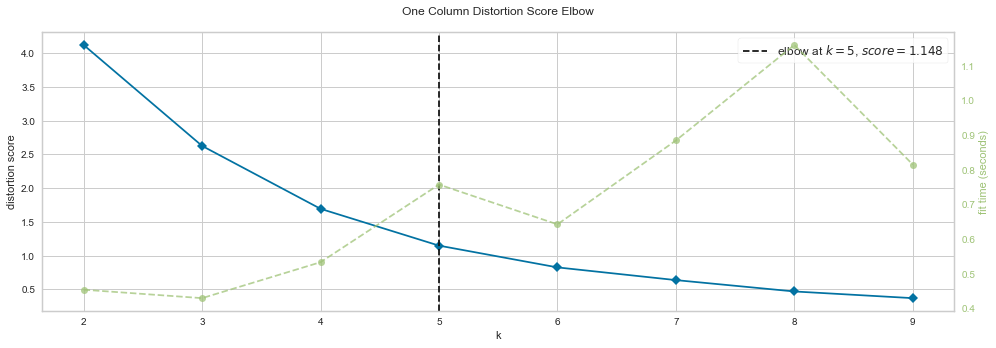

In [18]:

def k_value(df_scaled_one_column):

    plt.figure(figsize=(14, 5))
    elbow_score_2 = KElbowVisualizer(KMeans(random_state=42, max_iter=500), k=(2, 10))
    elbow_score_2.fit(df_scaled_one_column)
    elbow_score_2.finalize()
    elbow_score_2.ax.set_title('One Column Distortion Score Elbow\n')
    
    plt.tight_layout()
    plt.show()

k_value(df_scaled_one_column)

In [19]:
df_model_one_column.head()

,MEAN_ANNUAL_INCOME
1,59573
2,41098
3,55034
4,61709
5,57330


## Solution for the Problem - Clustering with Machine Learning

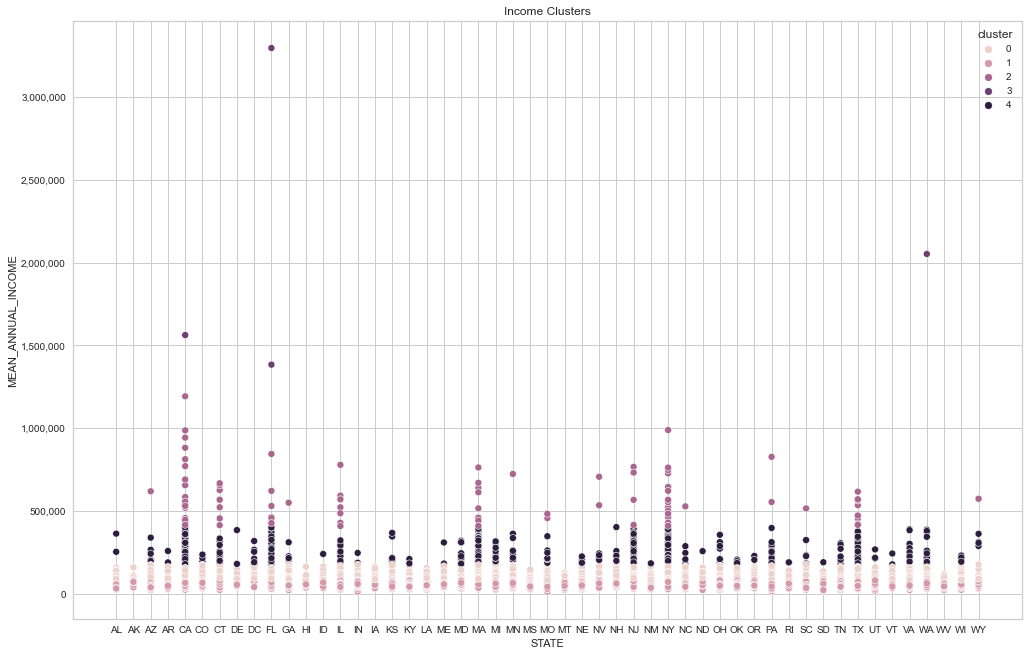

In [20]:

def kmeans_and_scatterplot(df_model_one_column):
    scaler = MinMaxScaler()

    df_scaled = scaler.fit_transform(df_model_one_column)
    kmeans_model = KMeans(n_clusters=5, random_state=42)
    cluster_labels = kmeans_model.fit_predict(df_scaled)
    df_cluster = df_income.copy()
    df_cluster["cluster"] = cluster_labels

    plt.figure(figsize=(17,11))

    ax = sns.scatterplot(x=df_cluster["STATE"], y=df_cluster["MEAN_ANNUAL_INCOME"], hue=df_cluster["cluster"], data=df_cluster)
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))
    
    plt.title('Income Clusters')

    plt.show()

    return df_cluster

df_one_column_cluster = kmeans_and_scatterplot(df_model_one_column)

In [21]:

cluster_mapping = {
    0: 1,
    1: 0,
    2: 3,
    3: 4,
    4: 2
}

df_one_column_cluster['cluster'] = df_one_column_cluster['cluster'].replace(cluster_mapping)

After clustering our data looks like this.

In [22]:
df_one_column_cluster.iloc[1459:1465,:]

,STATE,ZIPCODE,TOTAL_ANNUAL_INCOME_RETURN,TOTAL_ANNUAL_INCOME_AMOUNT,MEAN_ANNUAL_INCOME,cluster
1468,CA,90065,21980,1566016000,71247,0
1469,CA,90066,28560,3359986000,117646,1
1470,CA,90067,3550,3348461000,943228,3
1471,CA,90068,12150,1671226000,137549,1
1472,CA,90069,13140,2975467000,226443,2
1473,CA,90077,3980,2150951000,540439,3


## Clusters
- **Cluster 0 (Average and Below Average Income)**: ZIP Codes in this cluster exhibit mean income levels considered average and below average, ranging from **$12,000 to $81,000**. These areas might include regions with modest or below-average incomes.

- **Cluster 1 (Moderate Income)**: Encompasses ZIP Codes with moderate mean income levels, ranging from **$82,000 to $177,777**. These areas likely have average to slightly above-average incomes.
- **Cluster 2 (Above-Average Income)**: ZIP Codes in this cluster have higher incomes, ranging from **$177,777 to $403,000**. These areas might represent affluent neighborhoods or regions with more substantial disposable incomes.
- **Cluster 3 (High Income)**: Represents ZIP Codes with high-mean income levels, ranging from **$407,000 to $1,120,000**. These areas could include wealthy neighborhoods or regions with significant affluence.
- **Cluster 4 (Extreme Income)**: Represents ZIP Codes with very high-mean income levels, ranging from **$1,350,000 to $3,300,000**. These areas are characterized by exceptionally affluent neighborhoods or regions with extremely high disposable incomes.

In [23]:

# saving dataframe for later use
# df_one_column_cluster.to_csv("one_column_cluster.csv", index=False)


We will plot the clusters with map. We use the outsource data for the latitude and longitude values of zipcodes.

In [24]:

df_lat_lng = pd.read_csv("./data/zip_lat_long.csv", dtype={'ZIP': str})
df_zip = pd.read_csv("./data/19zpallnoagi.csv", dtype={'ZIPCODE': str}).iloc[:,1:3]

df_zip["cluster"] = df_one_column_cluster["cluster"]

# removing 00000 and 99999 zipcodes
df_zip.dropna(inplace=True)

df_merged = pd.merge(df_zip, df_lat_lng, left_on="ZIPCODE", right_on="ZIP", how='left')
df_merged.head()


,STATE,ZIPCODE,cluster,ZIP,LAT,LNG
0,AL,35004,0.00,35004,33.60,-86.49
1,AL,35005,0.00,35005,33.60,-87.00
2,AL,35006,0.00,35006,33.42,-87.21
3,AL,35007,0.00,35007,33.22,-86.80
4,AL,35010,0.00,35010,32.92,-85.94


In [25]:

df_cluster_zero = df_merged[df_merged["cluster"]==0]
df_cluster_one = df_merged[df_merged["cluster"]==1]
df_cluster_two = df_merged[df_merged["cluster"]==2]
df_cluster_three = df_merged[df_merged["cluster"]==3]
df_cluster_four = df_merged[df_merged["cluster"]==4]


## Analysis of Clusters

In [26]:

cluster_counts = df_merged['cluster'].value_counts().reset_index()
cluster_counts.columns = ['cluster', 'cluster_counts']

fig = px.pie(cluster_counts, values='cluster_counts', names='cluster', title='Cluster Proportions')
fig.show()

In [27]:
state_cluster_counts = df_merged.groupby(['STATE', 'cluster']).agg(cluster_counts=('cluster', 'size')).reset_index()
state_cluster_counts["cluster"] = state_cluster_counts["cluster"].astype("str")

In [28]:
def cluster_count_plot(df):
    df_plot = df.sort_values(by='cluster_counts', ascending=False)
    fig = px.bar(df_plot, x='STATE', y='cluster_counts',
                color='cluster', barmode='group',
                title='Cluster Counts per State', labels={'cluster_counts': 'Cluster Counts'})

    fig.update_layout(xaxis_title='State', yaxis_title='Cluster Counts', 
                    width=1200, height=800) 

    fig.show()
    
cluster_count_plot(state_cluster_counts[state_cluster_counts["cluster"].isin(["0.0","1.0"])])


In [29]:
cluster_count_plot(state_cluster_counts[state_cluster_counts["cluster"].isin(["2.0","3.0"])])

In [30]:

def stacked_bar_plot(df_plot):
    # Calculate the percentage of each cluster within each state
    df = df_plot.copy()
    df['percentage'] = (df['cluster_counts'] / df.groupby('STATE')['cluster_counts'].transform('sum')) * 100

    fig = px.bar(df, x='STATE', y='cluster_counts',
                 color='cluster', barmode='stack',
                 title='Cluster Percentages per State',
                 labels={'cluster_counts': 'Cluster Counts'})

    # Add text annotations for the percentages
    for state in df['STATE'].unique():
        state_df = df[df['STATE'] == state]
        total_counts = state_df['cluster_counts'].sum()
        y_position = 0  # Initialize y_position for each state
        for i, row in state_df.iterrows():
            percentage = row['percentage']
            fig.add_annotation(
                x=row['STATE'],
                y=y_position + row['cluster_counts'] / 2,
                text=f'{percentage:.0f}%',
                showarrow=False,
                font=dict(size=10),
            )
            y_position += row['cluster_counts']

    fig.update_layout(xaxis_title='State', yaxis_title='Cluster Counts',
                      width=1550, height=850)

    fig.show()
    
stacked_bar_plot(state_cluster_counts)


## Clusters on Map

In [32]:

def create_density_cluster_map(df, radius):
    fig = px.density_mapbox(
        df,
        lat='LAT',
        lon='LNG',
        z='cluster',
        radius=radius,
        zoom=3,
        mapbox_style='carto-positron',
        center=dict(lat=37.0902, lon=-95.7129),
        labels={'cluster': 'Cluster Density'},
        hover_name='STATE'
    )
    fig.update_layout(
        title='Density Map of Cluster Counts by State',
        mapbox=dict(
            style='carto-positron',
            center=dict(lat=37.0902, lon=-95.7129),
            zoom=3.5
        ),
        height=700,
        width=1400
    )
    fig.show()


## Average and Below Average Income (Cluster 0)

In [33]:
create_density_cluster_map(df_cluster_zero, 3)

| Some Average and Below Average Income Density Areas (Cluster 0) |  |  |  |  |  | |
|-------------------------|-------------------------| -------------------------| -------------------------| -------------------------| -------------------------|  -------------------------|
| San Antonio, TX         | Oklahoma City, OK       | Topeka, KS               | Kansas City, MO         | Chattanooga, TN         | New Orleans, LA         | Buffalo, NY          |
| Houston, TX             | Tulsa, OK               | Omaha, NE               | Saint Louis, MO         | Atlanta, GA             | Cincinnati, OH          | New York, NY          |
| Dallas, TX              | Wichita, KS             | Chicago, IL             | Birmingham, AL          | Pittsburgh, PA          | Detroit, MI             | Philadelphia, PA        |


## Average and Below Average Income (Cluster 0) Strategies

- **Localized Marketing Campaigns**: Target Cost-Effective Products, Essential Needs

- **Product Positioning and Offerings**: Discounts, Targeted Services

- **Sales and Distribution Channels**: Outlets

- **Customer Engagement and Relationship Building**: Loyalty Programs


## Moderate Income (Cluster 1)

In [34]:
create_density_cluster_map(df_cluster_one,3)

| Some Moderate Income Density Areas (Cluster 1) |  |  |  |  |  |
|-------------------------|-------------------------| -------------------------| -------------------------| -------------------------| -------------------------|
| Portland, WA           | Sacramento, CA     | Orlando, FL                |Los Angeles, CA          |Salt Lake City, UT         |Miami, FL              |
| Seattle, WA            | Denver, CO         | Cleveland, OH             | Las Vegas, NV           | Atlanta, GA               | Washington, DC        | 
| San Francisco, CA      | Houston, TX        | New York, NY              | Phoenix, AZ             | Chicago, IL               | Boston, MA            |

## Moderate Income (Cluster 1) Strategies

- **Localized Campaigns**: Social Media and Digital Marketing

- **Tailored Advertising Strategies**: Quality and Utility

- **Mid-range Product Focus**: Aim Varied Income

- **Sales and Distribution Channels**: Retail Locations

## Above-Average Income (Cluster 2)

In [35]:
create_density_cluster_map(df_cluster_two, 5)

| Some Above-Average Income Density Areas (Cluster 2) |  |  |  |  |  |
|-------------------------|-------------------------| -------------------------| -------------------------| -------------------------| -------------------------|
| San Francisco, CA          | Portland, WA     | Dallas, TX              |Chicago, IL             |Philadelphia, PA          |Atlanta, GA           |
| Los Angeles, CA            | Denver, CO       | Houston, TX            | Tampa, FL              | New York, NY             | Miami, FL            | 
| Seattle, WA                | Phoenix, AZ      | Austin, TX             | Washington, DC         | Boston, MA               | Nashville, TN        |

## Above-Average Income (Cluster 2) Strategies

- **Localized Campaigns**: Partnership and Events

- **Premium Product Appeal and Lifestyle**: Luxurious, Quality and Exclusivity

- **Sales and Distribution Channels**: High-end Malls

## High Income (Cluster 3)

In [36]:
create_density_cluster_map(df_cluster_three, 5)

| Some High Income Density Areas (Cluster 3) |  |  |
|-------------------------|-------------------------| -------------------------|
| Miami, FL                  | Chicago, IL         | Boston, MA            |
| Los Angeles, CA            | Bridgeport, CT      | Houston, TX            |
| San Francisco, CA          | New York, NC        |          | 

## High Income (Cluster 3) Strategies

- **Localized Campaigns**: Luxury Branding and Personalized Services

- **Exclusive Offerings**: Elite Offerings on High Income Groups Reside

- **Sales and Distribution Channels**: Exclusive Retail Spaces



## Extreme Income (Cluster 4)

In [37]:
create_density_cluster_map(df_cluster_four, 5)

| Extreme Income Density Areas (Cluster 4) | | | |
|-------------------------|-------------------------| -------------------------|-------------------------|
| Miami, FL               | West Palm Beach, FL             | Seattle, WA        | Los Angeles, CA         |

## Extreme Income (Cluster 4) Strategies

- **Localized Campaigns**: Unique Preferences and Collaborate High Profile Influencers

- **Product Positioning and Offerings**: Exclusive and Personalized VIP Services

- **Sales and Distribution Channels**: High-end Shopping Districts and Luxury Boutiques


---

### Some of the Challanges During The Analysis

- Understanding data and deciding which features to use in clustering and analysis

- Deciding number of clusters in modelling phase.

- Finding Lat Lng data for zipcodes.

### Further Could Do's:
- Using 19zpallagi.csv data and deep analyze zipcode clusters with agi level wise.

- Understand the spendings with other columns and get behaviours of every zipcode/state. (e.g. A03220 (Educator expenses amount))

- Use other approaches like dbscan and hierarchical clustering and comparing their performances.

- Using few digits of zipcode to more generalized map.

# Q&A